## Actividad modulo 28 - Clasificacion

#### the dataset was taken from: 
- https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study


### Data para clasificacion: general_data.csv

- Descripcion de las columnas del dataset:

* Age: Age of the employee
* Attrition: Whether the employee left in the previous year or not
* BusinessTravel: How frequently the employees travelled for business purposes in the last year
* Department: Department in company
* DistanceFromHome: Distance from home in kms
* Education: Education Level
* EducationField: Field of education
* EmployeeCount: Employee count
* EmployeeNumber: Employee number/id
* EnvironmentSatisfaction: Work Environment Satisfaction Level
* Gender: Gender of employee
* JobLevel: Job level at company on a scale of 1 to 5
* JobRole: Name of job role in company
* MaritalStatus: Marital status of the employee
* MonthlyIncome: Monthly income in rupees per month
* NumCompaniesWorked: Total number of companies the employee has worked for
* Over18: Whether the employee is above 18 years of age or not
* PercentSalaryHike: Percent salary hike for last year
* PerformanceRating: Performance rating for last year
* StandardHours: Standard hours of work for the employee
* StockOptionLevel: Stock option level of the employee
* TotalWorkingYears: Total number of years the employee has worked so far
* TrainingTimesLastYear: Number of times training was conducted for this employee last year
* YearsAtCompany: Total number of years spent at the company by the employee
* YearsSinceLastPromotion: Number of years since last promotion
* YearsWithCurrManager: Number of years under current manager

- La idead el modelo es predecir si un empleado se va a ir de la empresa o no (attrition)
- Metodo: Regresion Logistica


In [2]:
# Configuraciones preliminares

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 28')

In [3]:
# Se usa la funcion read_csv para leer el archivo.csv
df= pd.read_csv('general_data.csv')

## Exploratory Data Analysis

In [4]:
df.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4059,49,No,Travel_Frequently,Sales,11,4,Life Sciences,1,4060,Male,...,3.0,Y,11,8,1,28.0,4,5,4,3
3269,52,No,Travel_Rarely,Research & Development,29,3,Life Sciences,1,3270,Male,...,8.0,Y,11,8,1,9.0,1,5,1,4
4402,37,Yes,Travel_Frequently,Sales,2,3,Marketing,1,4403,Male,...,6.0,Y,11,8,1,17.0,2,1,0,0
4198,34,No,Non-Travel,Research & Development,7,2,Technical Degree,1,4199,Female,...,0.0,Y,13,8,1,10.0,2,9,8,7
182,34,Yes,Travel_Frequently,Sales,17,1,Marketing,1,183,Male,...,9.0,Y,22,8,1,11.0,5,3,0,2
4259,25,Yes,Travel_Rarely,Sales,10,1,Marketing,1,4260,Male,...,1.0,Y,13,8,0,6.0,6,6,0,3
1831,33,No,Travel_Rarely,Research & Development,8,4,Life Sciences,1,1832,Male,...,1.0,Y,13,8,1,9.0,3,9,0,8
48,32,No,Travel_Rarely,Sales,2,3,Marketing,1,49,Male,...,1.0,Y,21,8,1,13.0,4,13,4,8
1815,45,No,Travel_Rarely,Research & Development,10,4,Life Sciences,1,1816,Male,...,1.0,Y,12,8,2,1.0,2,1,0,0
1928,41,No,Travel_Frequently,Sales,11,3,Other,1,1929,Male,...,2.0,Y,15,8,1,21.0,2,18,0,11


In [5]:
df.info()
# Todos los campos que no son numericos estan como tipo object
# A todos estos campos se les deberia traducir a numericos para que la regresion lineal los tome directamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
# Obtener los principales estadisticos para cada uno
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [7]:
# Se ve el total de valores unicos por cada columna
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

### Insights

- Inicialmente, se ven algunas oportunidades de cambios de datos como Business Travel, Education Field, Department, etc.
- Se van a generar numeros para cada una de ellas con la funcion catcodes, pero se podrian tambien generar variables tipo Dummy
- Las columnas EmployedID tiene un valor diferente por cada registro (es su ID), por lo que no aportaria informacion al modelo. Debe eliminarse
- La columna EmployeeCount, Over18 y StandardHours tienen solamente un valor, tienen que eliminarse.
 

### Validacion de Datos

In [8]:
df.shape

(4410, 24)

In [9]:
# Validar cuantas celdas en total son nulas
print('Existen ',df.isnull().sum().sum(), ' valores no existentes')



Existen  28  valores no existentes


In [13]:
# Numero de datos vacios por columna
print('Columnas que tienen valores nulos' '\n')
print(df.isnull().sum())


Columnas que tienen valores nulos

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [15]:
# Muestra las columnas que no tienen cero, es decir las que tienen los valores nulos
missing_values_count =df.isnull().sum()
df.columns[missing_values_count.to_numpy().nonzero()]

Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object')

In [16]:
df[['NumCompaniesWorked', 'TotalWorkingYears']].sample(10)

,NumCompaniesWorked,TotalWorkingYears
1110,1.0,16.0
3826,7.0,10.0
4073,4.0,20.0
2738,1.0,9.0
3683,4.0,8.0
3931,1.0,2.0
2560,2.0,22.0
1989,1.0,1.0
657,1.0,2.0
2455,4.0,9.0


### Insights

- Las columnas 'NumCompaniesWorked', 'TotalWorkingYears' son las que tienen valores nulos
- Como tecnica de inputacion, se decide imputar el promedio a cada una de ellas.

### Imputacion de datos

In [17]:
# Reemplazar con el promedio general
# Calcula el promedio del Income de todo el dataset

NumCompaniesWorked_mean=int(df['NumCompaniesWorked'].mean())
TotalWorkingYears_mean=int(df['TotalWorkingYears'].mean())

# Imputa el promedio a todos los registros definidos como NaN
df['NumCompaniesWorked']=df['NumCompaniesWorked'].fillna(NumCompaniesWorked_mean)
df['TotalWorkingYears']=df['TotalWorkingYears'].fillna(TotalWorkingYears_mean)

In [19]:
# Nueva Revision
# Numero de datos vacios por columna
print('Columnas que tienen valores nulos' '\n')
print(df.isnull().sum())

Columnas que tienen valores nulos

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


### Analisis de Correlacion

C:\Users\oscah\AppData\Local\Temp\ipykernel_3048\2329627510.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=corr=df.corr(method='pearson')


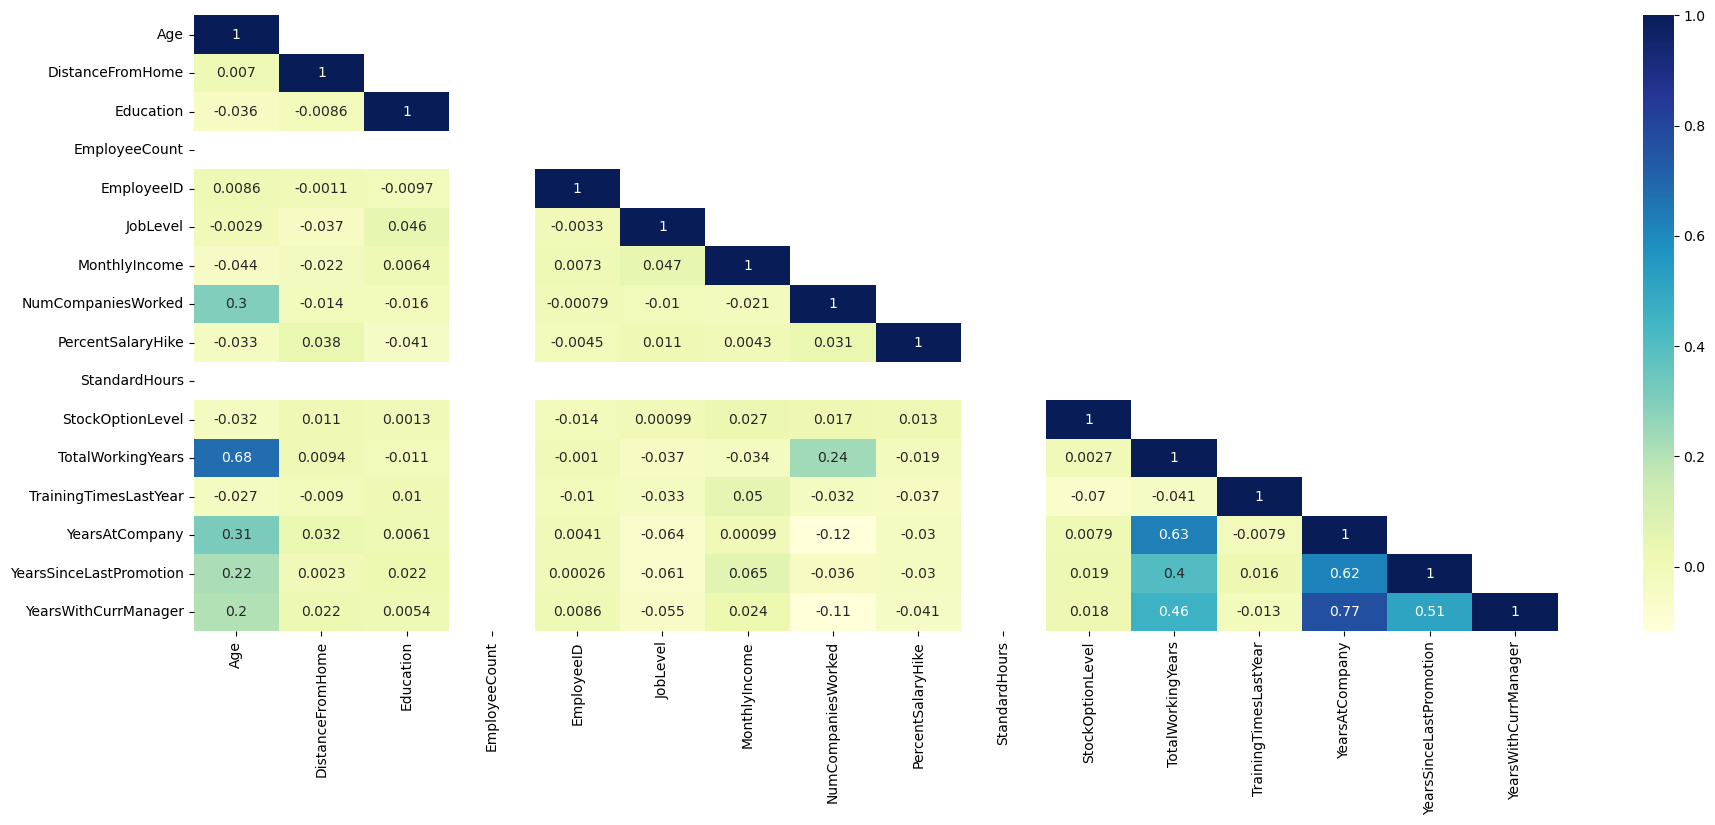

In [20]:
# Grafica de Correlacion
plt.figure(figsize=(22,8))
corr_df=corr=df.corr(method='pearson')
df_lt=corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu',annot=True)

### Insights
- Se tiene una correlacion alta entre: YearsatCompany vs YearsWithCurrManager (0.77) y TotalWorkingYears y Age (0.68). Son altas correlaciones, pero no se necesita eliminar ninguna columna por posible multicolinearidad

### Grafica por Distribucion

In [21]:
# Para escoger las columnas numericas
numerics=['int16','int32','int64','float64']
df.select_dtypes(include=numerics).sample(5)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1171,39,4,4,1,1172,1,134020,7.0,14,8,1,18.0,1,7,1,7
256,33,15,4,1,257,1,24060,1.0,11,8,0,10.0,3,10,9,7
1772,34,20,3,1,1773,3,57440,3.0,19,8,1,7.0,4,0,0,0
2819,39,7,3,1,2820,1,196580,4.0,13,8,1,17.0,3,15,5,9
3776,40,10,1,1,3777,1,65240,0.0,13,8,1,9.0,2,8,7,1


In [24]:
# Se selecciona las columnas de tipo numerico

cols_num=df.columns[[np.issubdtype(dt,np.number) for dt in df.dtypes]]

In [25]:
cols_num
# 16 columnas

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
cols_num3=[col for col in df.columns if (df[col].dtypes!='object')]
cols_num3

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeID',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [40]:
cols_num2=[col for col in df.columns if any([df[col].dtypes=='int16',df[col].dtypes=='int32',df[col].dtypes=='int64',df[col].dtypes=='float64'])]
cols_num2

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeID',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

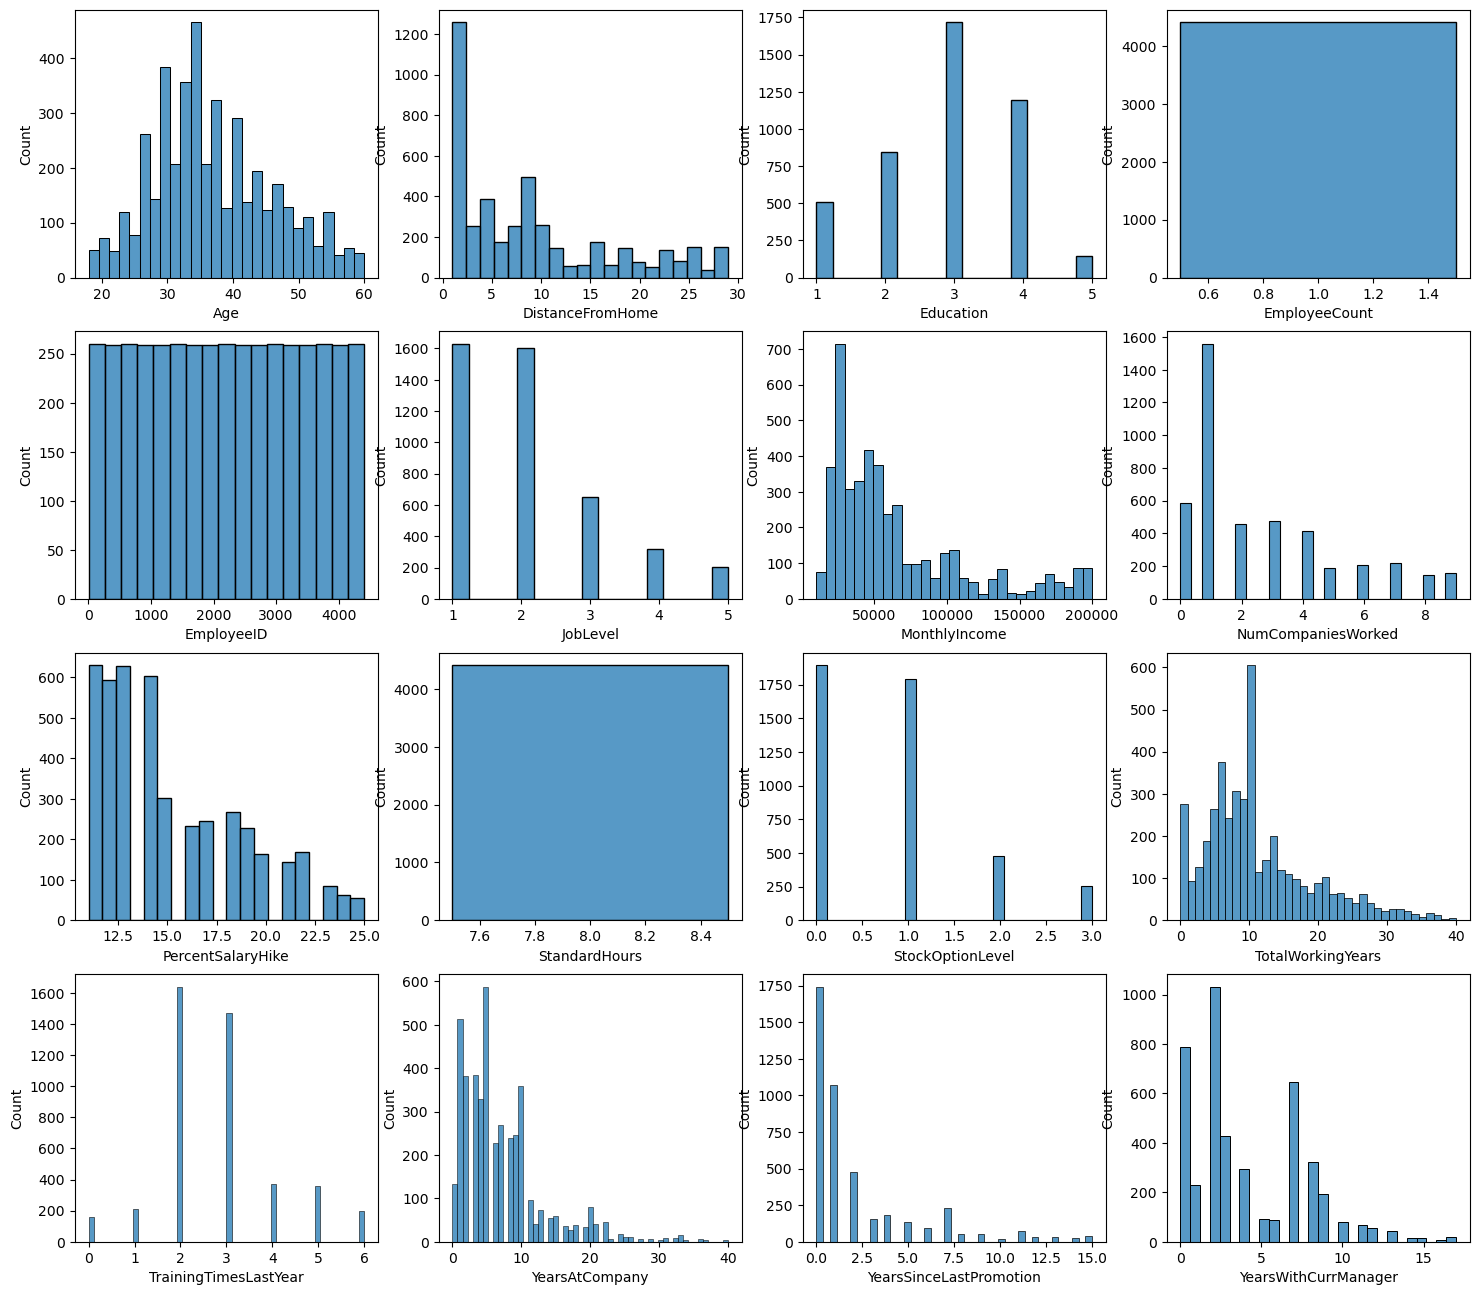

In [32]:
# Grafica exploratoria de todas las columnas (16)

fig, axes = plt.subplots(nrows=4,ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
 sns.histplot(df[column],ax=axes[i//4,i%4],kde=False)


#### Insights

- Las columnas YearsAtCompany, TotalWorkingYears, MonthlyIncome paracen estar sesgadas
- El rango de las variables MonthlyIncome se podria estandarizar (esta en cientos de miles)

- Las columnas StandardJHours,Employed no aportan ningun valor al modelo

- EmployeeCount siendo siempre uno seguramente es utilizada para hacer cuentas de empleados y no usar el EmployeeID u otros valores


## Analisis Bivariado

In [41]:
# Se pueden hacer analisis por variables mas bien logicas.
df.groupby(['YearsAtCompany']).mean().T

C:\Users\oscah\AppData\Local\Temp\ipykernel_3048\4214313819.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['YearsAtCompany']).mean().T


YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
Age,31.227273,35.058480,34.708661,35.125000,36.572727,36.862245,35.447368,35.988889,36.987500,39.048780,...,50.0,55.5,50.0,52.333333,50.666667,52.6,52.0,55.0,58.0,58.0
DistanceFromHome,7.204545,8.040936,9.960630,10.015625,10.790909,8.663265,8.407895,9.911111,8.737500,8.329268,...,6.0,12.0,3.0,20.666667,4.333333,13.6,21.0,12.5,8.0,2.0
Education,3.227273,2.853801,2.952756,2.992188,2.900000,2.821429,2.842105,2.811111,2.850000,2.939024,...,4.0,3.0,3.0,2.333333,3.000000,3.0,5.0,2.5,4.0,2.0
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
EmployeeID,2157.613636,2198.777778,2215.937008,2192.351562,2254.445455,2200.653061,2178.013158,2199.677778,2075.462500,2275.353659,...,2191.5,1877.5,2351.0,1786.666667,1983.666667,2483.8,1774.0,1906.0,2781.0,2809.0
JobLevel,1.818182,2.140351,2.039370,2.132812,2.381818,2.040816,1.960526,2.100000,1.925000,2.268293,...,3.5,1.5,2.0,1.333333,2.000000,2.2,3.0,1.0,2.0,1.0
MonthlyIncome,62946.136364,64813.040936,60889.370079,70544.843750,62060.545455,60875.357143,66514.605263,65454.666667,64735.875000,64392.073171,...,65815.0,63980.0,42940.0,42086.666667,22406.666667,46374.0,28890.0,41155.0,29720.0,43850.0
NumCompaniesWorked,2.916667,2.951267,3.519685,3.023438,3.112121,2.770408,2.368421,2.859259,2.687500,1.621951,...,2.5,4.5,2.0,3.000000,1.000000,0.6,1.0,0.5,0.0,1.0
PercentSalaryHike,16.159091,14.877193,15.503937,15.125000,15.700000,15.056122,15.565789,15.333333,15.450000,15.365854,...,13.0,16.0,20.0,18.333333,13.000000,17.4,11.0,17.5,14.0,13.0
StandardHours,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.0,8.0,8.0,8.000000,8.000000,8.0,8.0,8.0,8.0,8.0


In [42]:
df.groupby(['JobLevel']).mean().T

C:\Users\oscah\AppData\Local\Temp\ipykernel_3048\1067281539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['JobLevel']).mean().T


JobLevel,1,2,3,4,5
Age,36.775322,37.367041,36.266055,36.377358,37.579710
DistanceFromHome,9.381215,9.415730,8.784404,8.273585,8.681159
Education,2.841621,2.945693,2.940367,3.047170,2.927536
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeID,2189.810313,2237.709738,2196.220183,2142.886792,2205.202899
MonthlyIncome,62677.421731,65506.479401,63545.321101,77940.754717,64698.405797
NumCompaniesWorked,2.669122,2.742821,2.772171,2.443396,2.603865
PercentSalaryHike,14.963168,15.475655,15.412844,14.783019,15.101449
StandardHours,8.000000,8.000000,8.000000,8.000000,8.000000
StockOptionLevel,0.823204,0.758427,0.793578,0.716981,0.956522


In [43]:
# Se ve una evolucion en el llamado seleccionando solamente algunas columnas
df.groupby(['StockOptionLevel']).mean()[['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears']]

C:\Users\oscah\AppData\Local\Temp\ipykernel_3048\1661219940.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['StockOptionLevel']).mean()[['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears']]


,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears
StockOptionLevel,,,,
0,36.939778,9.169572,63077.606973,11.159007
1,37.278523,9.156040,66549.630872,11.378076
2,36.354430,9.025316,66898.924051,11.810127
3,35.376471,9.929412,65382.470588,10.494118


In [44]:
df.groupby(['StockOptionLevel']).median()[['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears']]

C:\Users\oscah\AppData\Local\Temp\ipykernel_3048\102472662.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['StockOptionLevel']).median()[['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears']]


,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears
StockOptionLevel,,,,
0,36.0,7.0,47410.0,10.0
1,36.0,7.0,50790.0,10.0
2,36.0,7.0,49985.0,10.0
3,35.0,8.0,46800.0,9.0


In [45]:
# Se ve una evolucion en el llamado seleccionando solamente algunas columnas
df.groupby(['DistanceFromHome']).mean()[['Age','YearsAtCompany','MonthlyIncome','StockOptionLevel','TotalWorkingYears']]

C:\Users\oscah\AppData\Local\Temp\ipykernel_3048\1905940162.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['DistanceFromHome']).mean()[['Age','YearsAtCompany','MonthlyIncome','StockOptionLevel','TotalWorkingYears']]


,Age,YearsAtCompany,MonthlyIncome,StockOptionLevel,TotalWorkingYears
DistanceFromHome,,,,,
1,36.975962,6.711538,74225.961538,0.836538,11.035256
2,37.118483,6.995261,61561.184834,0.800948,11.507109
3,36.869048,7.511905,57366.666667,0.809524,11.321429
4,38.296875,6.546875,67159.531250,0.562500,11.718750
5,37.307692,6.876923,65834.615385,0.692308,11.384615
6,37.186441,8.525424,56150.847458,0.881356,12.542373
7,35.250000,6.035714,61265.000000,0.785714,10.095238
8,36.137500,5.875000,66123.125000,0.675000,10.412500
9,36.823529,5.517647,70304.588235,0.764706,10.305882


### Feature Engineering

In [46]:
# Genera una copia del df original
df2=df.copy()

In [47]:
# Se obtiene una muestras del nuevo dataframe
df2.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3782,35,No,Travel_Rarely,Research & Development,10,1,Life Sciences,1,3783,Male,...,0.0,Y,11,8,0,6.0,3,5,4,2
1306,32,No,Travel_Rarely,Sales,15,3,Marketing,1,1307,Male,...,1.0,Y,14,8,0,12.0,6,11,5,7
2832,40,No,Travel_Frequently,Research & Development,26,4,Medical,1,2833,Male,...,1.0,Y,12,8,1,20.0,2,20,2,13
1852,24,No,Non-Travel,Research & Development,2,5,Technical Degree,1,1853,Male,...,0.0,Y,22,8,1,6.0,3,5,3,4
1943,20,Yes,Travel_Rarely,Research & Development,2,2,Life Sciences,1,1944,Female,...,1.0,Y,17,8,1,1.0,3,1,0,0


In [48]:
# Eliminar columnas no necesarias

drop_columns=['EmployeeID','StandardHours','Over18','EmployeeCount']

for col in drop_columns:
    df2.drop(col,axis=1,inplace=True)

In [61]:
categ_columns=['BusinessTravel','Department','EducationField','Gender','Attrition']

for col in categ_columns:
    df2[col]=df2[col].astype('category')

# Cambia la columna NumCompaniesWorked a entero
df2['NumCompaniesWorked']=df2['NumCompaniesWorked'].fillna(0).astype(np.int64)

In [50]:
# Nuevo muestreo del dataframe reducido
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3355,33,No,Travel_Rarely,Sales,2,3,Marketing,Female,1,Sales Executive,Single,59140,3,16,1,6.0,4,3,0,2
1414,34,No,Travel_Frequently,Research & Development,7,2,Medical,Male,4,Sales Representative,Divorced,29740,1,23,0,5.0,2,5,2,0
2575,33,No,Travel_Rarely,Sales,1,3,Life Sciences,Female,5,Sales Executive,Single,12230,1,13,1,10.0,3,10,0,9


In [51]:
# balanceo de clases

to_see=['BusinessTravel','Department','EducationField']

for column in to_see:
    helper = df2.groupby(column)[column].count().rename('total').reset_index()

    helper['percent']=(helper['total']/helper['total'].sum())*100
    print('\n' + column)
    print(helper)


BusinessTravel
      BusinessTravel  total    percent
0         Non-Travel    450  10.204082
1  Travel_Frequently    831  18.843537
2      Travel_Rarely   3129  70.952381

Department
               Department  total    percent
0         Human Resources    189   4.285714
1  Research & Development   2883  65.374150
2                   Sales   1338  30.340136

EducationField
     EducationField  total    percent
0   Human Resources     81   1.836735
1     Life Sciences   1818  41.224490
2         Marketing    477  10.816327
3           Medical   1392  31.564626
4             Other    246   5.578231
5  Technical Degree    396   8.979592


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   object  
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   Gender                   4410 non-null   category
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4410 non-null   int64   
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

In [62]:
# Cambia de tipo de columna a Attrition (1/0) y otras
# new skill
#categ_columns=['BusinessTravel','Department','EducationField','Gender','MaritalStatus','JobRole']
df2.BusinessTravel=df2.BusinessTravel.astype('category').cat.codes
df2.Department=df2.Department.astype('category').cat.codes
df2.EducationField=df2.EducationField.astype('category').cat.codes
df2.Gender=df2.Gender.astype('category').cat.codes
df2.MaritalStatus=df2.MaritalStatus.astype('category').cat.codes
df2.JobRole=df2.JobRole.astype('category').cat.codes
df2.Attrition=df2.Attrition.astype('category').cat.codes

In [57]:
df2.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1059,27,No,1,2,8,4,1,1,5,6,2,21070,0,13,0,6.0,2,5,0,2
1242,33,No,2,2,3,3,3,1,1,4,2,43730,4,14,0,7.0,3,1,0,0
3832,35,No,2,1,2,3,3,0,2,7,1,21570,1,25,0,16.0,1,16,1,10
4149,27,No,2,1,8,2,3,1,1,2,1,164220,1,20,1,6.0,3,6,0,3
690,30,No,2,1,6,4,3,0,1,7,1,30410,1,11,1,9.0,2,9,0,8


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int8   
 2   BusinessTravel           4410 non-null   int8   
 3   Department               4410 non-null   int8   
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int8   
 7   Gender                   4410 non-null   int8   
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int8   
 10  MaritalStatus            4410 non-null   int8   
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   int64  
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [64]:
# Si es que las dimensiones de los campos son demasiado grandes
# es ideal estandarizarlas.
# Como por ejemplo Income, que tiene un orden de magnitud mas grande que el resto
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2['MonthlyIncome_scale']= StandardScaler().fit_transform(df2[['MonthlyIncome']])

In [65]:
# Opcional - Elimnar la variable original
df2.drop('MonthlyIncome',axis=1,inplace=True)

## Feature Engineering

- Valores con alta correlacion

- Eliminar datos de Identificacions

- Clases desbalanceadas

- Asignacion de variables alfanumericas con numericas

- Imputacion de datos (Imputer) valores nulos

- Cambiar columnas yes/no a 1/0 (pd.factorize)

- Generar campos tipo categoria

- Esntdarizar variables

In [68]:
df2.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
NumCompaniesWorked           10
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
MonthlyIncome_scale        1349
dtype: int64

In [71]:
df2.shape

(4410, 20)

In [73]:
missing_values_count=df2.isnull().sum()
missing_values_count

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
MonthlyIncome_scale        0
dtype: int64

In [75]:
col = df2.columns.to_list()
col

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'MonthlyIncome_scale']

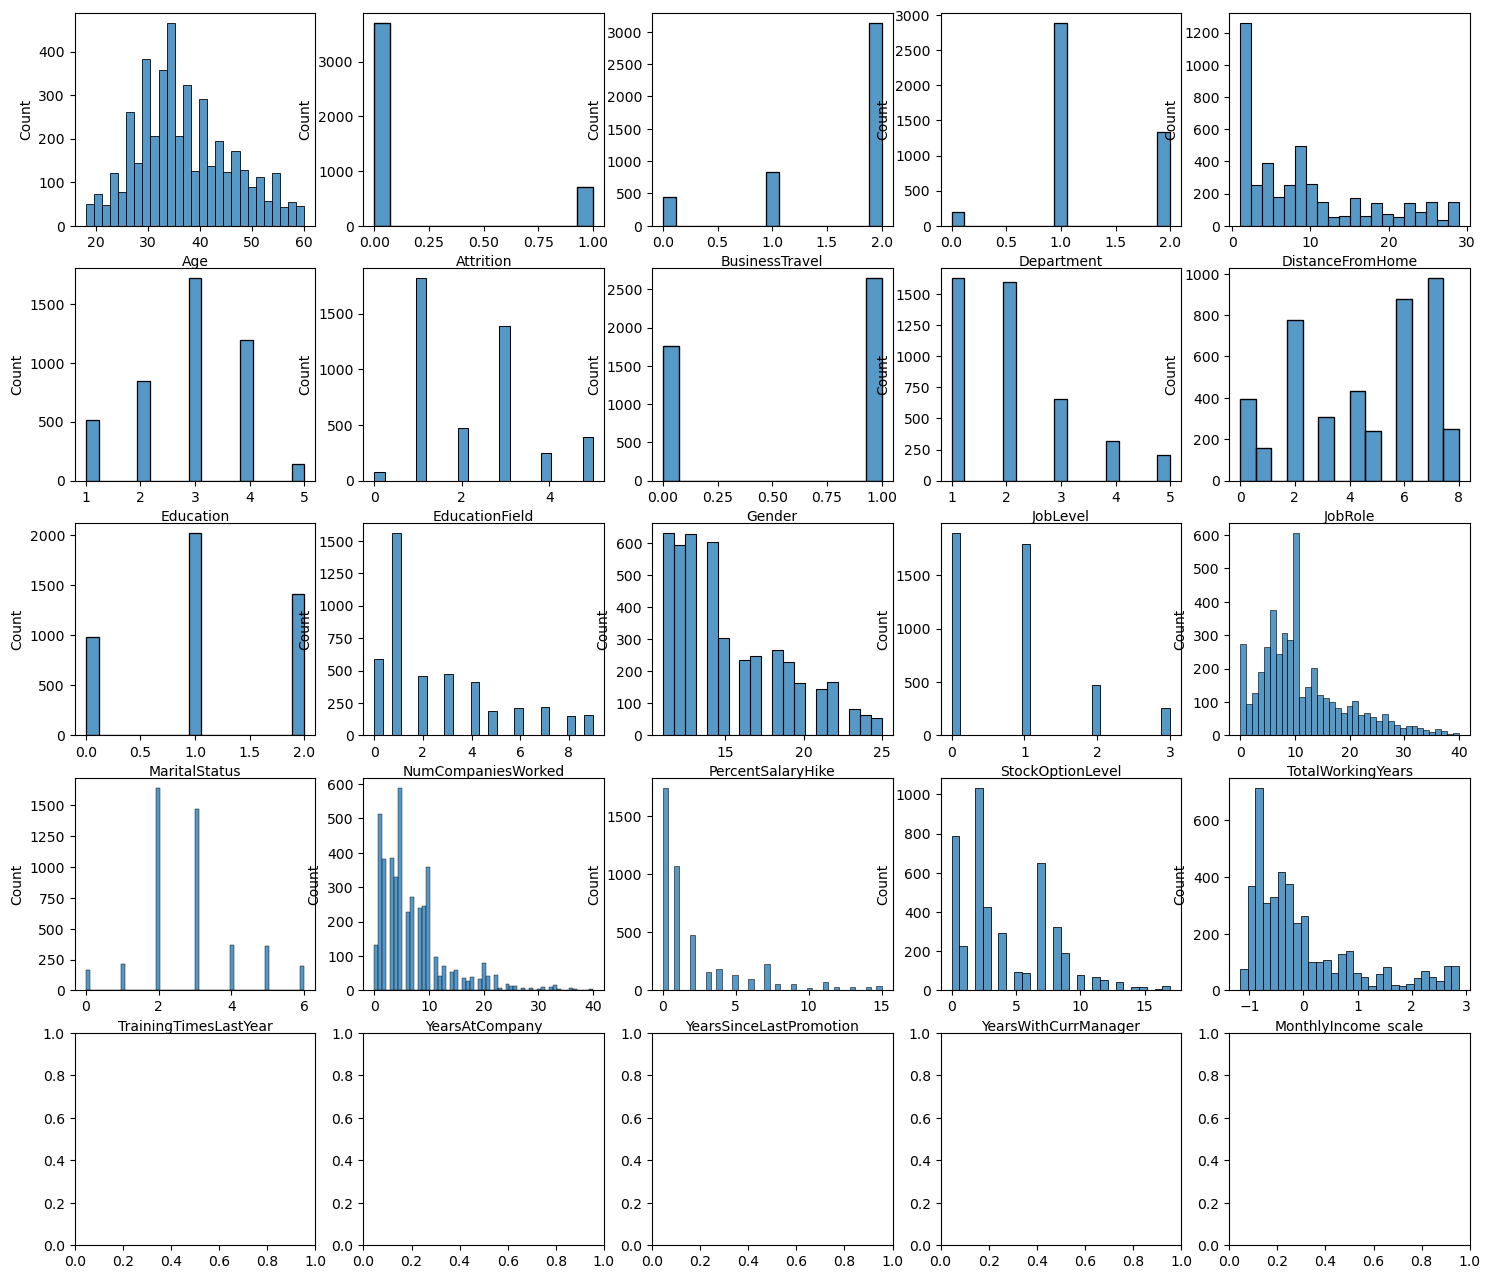

In [76]:
fig, axes = plt.subplots(nrows=5,ncols=5, figsize=(18,16))
for i, column in enumerate(col):
 sns.histplot(df2[column],ax=axes[i//5,i%5],kde=False)

### Data Split

In [77]:
from sklearn.model_selection import train_test_split

X=df2.drop('Attrition',axis=1)
y=df2['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [78]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_scale
0,51,2,2,6,2,1,0,1,0,1,1,11,0,1.0,6,1,0,0,1.405136
1,31,1,1,10,1,1,0,1,6,2,0,23,1,6.0,3,5,1,4,-0.491661
2,32,1,1,17,4,4,1,4,7,1,1,15,3,5.0,2,5,0,3,2.725053
3,38,0,1,2,5,1,1,3,1,1,3,11,3,13.0,5,8,7,5,0.386301
4,32,2,1,10,1,3,1,1,7,2,4,12,2,9.0,2,6,0,4,-0.884109


In [79]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int8

### Regresion Logistica

In [80]:
# Ref https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6
print(df2['Attrition'].value_counts())
print(df2['Attrition'].value_counts(normalize=True))

0    3699
1     711
Name: Attrition, dtype: int64
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [81]:
# Este es un problema que tiene una clase desbalanceada
# Ref https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
# Ref https://machinelearningmastery.com/cost-sensitive-logistic-regression/


In [82]:
# Se muestra el ejemplo con class_weight y sin class_weight
# class_weight = 'balanced' - it basically means replicating the smaller class until you have as many samples as in the larger one, but in an implicit way.
# class_weight=''
#model= LogisticRegression(solver='lbfgs', class_weight=weights)

In [85]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Adapta el modelo a los X_train y y_train (entrenamiento)
model= LogisticRegression(solver='liblinear', class_weight='balanced')
# model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
# Hace la prediccion en X_test y la guarda en y_predict
y_predict = model.predict(X_test)

In [86]:
# La prediccion no es mas que un conjunto de 0s y 1s que se aplican al mismo dataset
y_predict[0:200]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int8)

In [88]:
#Build a dataframe with the original and predicted values
z=X_test.copy()
z['Attrition real'] = y_test
z['Attrition prediccion']= y_predict
z[['Attrition real','Attrition prediccion']].head(20)

,Attrition real,Attrition prediccion
2016,0,0
4118,0,1
219,0,0
4402,1,0
787,0,0
200,0,0
2539,0,0
3744,0,1
1891,0,1
3963,1,1


In [89]:
# Genera los coeficientes de la ecuacion
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns
#Incluye el intercept
coef_df['intercept']=model.intercept_
coef_df.T

,0
Age,-0.026641
BusinessTravel,0.018738
Department,-0.284587
DistanceFromHome,0.001539
Education,-0.040475
EducationField,-0.079886
Gender,0.124692
JobLevel,-0.073899
JobRole,0.052851
MaritalStatus,0.624702


Text(0.5, 1.0, 'Matriz de Confusion')

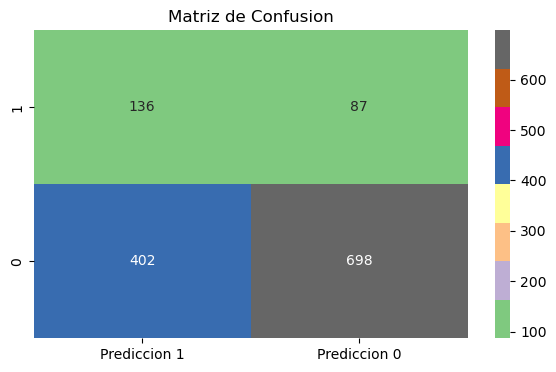

In [91]:
# Genera la matriz de confusion
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns=[i for i in['Prediccion 1','Prediccion 0']])
plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True, cmap='Accent', fmt='d').set_title('Matriz de Confusion')

In [92]:
# Calculo manual de Falsos Positivos, Falsos Negativos, Verdaderos Positivos y Verdaderos Negativos.
# Primero que nada se debe tener que tipo de Clase de prediccion se va a manejar: positiva o negativa
# En el caso del modelo de este notebook, la clase es positiva: Request Accepted = 1, acepto la oferta

# Un TP es un valor que fue observado y predicho como positivo
# Un TN es un valor que fue observado y predicho como negativo
# Un FP es un valor que fue observado como negarivo pero predicho como positivo
# Un FN es un valor que fue observado como positivo pero predicho como negativo


TP= df_cm.iloc[0][0]
FP= df_cm.iloc[0][1]
FN= df_cm.iloc[1][0]
TN= df_cm.iloc[1][1]

print('TP =',TP,'FP =',FP,'FN =',FN,'TN =',TN)

TP = 136 FP = 87 FN = 402 TN = 698


In [94]:
# Medidas del Modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
precision_score = precision_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)

print('Medidas del Modelo')
print('________')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Roc Auc Score = {0:0.2f}'.format(roc_auc_score(y_test,y_predict)))

Medidas del Modelo
________
Accuracy = 0.63
Precision = 0.25
Recall = 0.61
F1 Score = 0.36
Roc Auc Score = 0.62


In [96]:
# Un nuevo intento
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# Hace la prediccion en X_test y la guarda en y_predict
y_predict= model.predict(X_test)

In [97]:
# Medidas del Modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
precision_score = precision_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)

print('Medidas del Modelo')
print('________')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Roc Auc Score = {0:0.2f}'.format(roc_auc_score(y_test,y_predict)))

Medidas del Modelo
________
Accuracy = 0.84
Precision = 0.82
Recall = 0.06
F1 Score = 0.12
Roc Auc Score = 0.53
